#Tasks:


Sobre los informes de felicidad de 2015 y 2016, realizaremos las siguientes exploraciones:



* Cargar los dos CSV como datasets.
* Identificar las columnas de ambos datasets: ¿hay diferencias entre ambos?
* Unir ambos dataframes
* Revisar el número de nulos que hay por cada columna, así como su porcentaje.
* Cambiar los valores nulos de las columnas "Lower Confidence Interval" y "Upper Confidence Interval" por un número aleatorio entre el valor mínimo y máximo de la misma columna 
* Cambiar los valores nulos de la columna "Standard Error" por su media al cuadrado.
* Obténer un resumen estadístico del dataframe sin valores nulos.
* Mostrar de forma gráfica la relación entre la familia y la salud.
* Mostrar de forma gráfica la relación entre la puntuación de felicidad y la confianza (corrupción del gobierno).
* Mostrar la matriz de correlación del daframe.
* Tras unir los dataframes, los países aparecerán más de una vez. Mostrar agrupado el dataframe por país con el valor máximo de felicidad, sin importar el año.
* ¿Tiene relación la felicidad con la generosidad? Mostrar gráficamente a través de la puntuación de libertad.
* Mostrar la distribución del grado de distopía en función de la región.

Cargar los dos CSV como datasets.

In [2]:
import pandas as pd

df2015 = pd.read_csv(r'C:\Users\andre\Downloads\archive (32)\2015.csv')
df2016 = pd.read_csv(r'C:\Users\andre\Downloads\archive (32)\2016.csv')

In [5]:
df2015.columns


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [6]:
df2016.columns  # Se puede ver que no hay diferencias entre los datasets en las columnas, son las mismas.

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

Unimos ambos dataframes

In [24]:
df_merged = pd.concat([df2015, df2016], ignore_index=True)
df_merged.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NaN,NaN


número de nulos que hay por cada columna, así como su porcentaje.

In [25]:
def nulls(df):
    total_nulls = df.isnull().sum()
    percentage_nulls = (total_nulls/len(df))*100
    return total_nulls, percentage_nulls
nulls(df=df_merged)
# Podemos observar que hay valores nulos en Standard Error, Lower Confidence Interval y Upper Confidence Interval.

(Country                            0
 Region                             0
 Happiness Rank                     0
 Happiness Score                    0
 Standard Error                   157
 Economy (GDP per Capita)           0
 Family                             0
 Health (Life Expectancy)           0
 Freedom                            0
 Trust (Government Corruption)      0
 Generosity                         0
 Dystopia Residual                  0
 Lower Confidence Interval        158
 Upper Confidence Interval        158
 dtype: int64,
 Country                           0.00000
 Region                            0.00000
 Happiness Rank                    0.00000
 Happiness Score                   0.00000
 Standard Error                   49.84127
 Economy (GDP per Capita)          0.00000
 Family                            0.00000
 Health (Life Expectancy)          0.00000
 Freedom                           0.00000
 Trust (Government Corruption)     0.00000
 Generosity            

Cambiamos los valores nulos de las columnas "Lower Confidence Interval" y "Upper Confidence Interval" por un número aleatorio entre el valor mínimo y máximo de la misma columna 

In [32]:
max_lower = df_merged['Lower Confidence Interval'].max()
min_lower = df_merged['Lower Confidence Interval'].min()
max_upper = df_merged['Upper Confidence Interval'].max()
min_upper = df_merged['Upper Confidence Interval'].min()

In [53]:
import random 
num_aleatorio_lower = random.uniform(min_lower, max_lower)
df_merged['Lower Confidence Interval'].fillna(num_aleatorio_lower, inplace = True)

In [54]:
num_aleatorio_upper = random.uniform(min_upper, max_upper)
df_merged['Upper Confidence Interval'].fillna(num_aleatorio_upper, inplace = True)

Cambiamos los valores nulos de la columna "Standard Error" por su media al cuadrado.

In [55]:
media = (df_merged['Standard Error'].mean())**2
media
df_merged['Standard Error'].fillna(media, inplace = True)

Obtenemos un resumen estadístico del dataframe sin valores nulos.

In [58]:
df_merged.isnull().sum() # vemos que ya no tenemos ningun valor nulo con las modificaciones que hemos hecho
df_merged.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,79.238095,5.378949,0.025161,0.899837,0.892647,0.594054,0.399896,0.140532,0.239957,2.212032,4.967847,6.203408
std,45.538922,1.141531,0.025851,0.410780,0.286718,0.240790,0.150684,0.115490,0.130077,0.558728,0.868004,1.077272
min,1.000000,2.839000,0.002293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.732000,3.078000
25%,40.000000,4.510000,0.002293,0.594900,0.739880,0.419645,0.295890,0.061315,0.151430,1.884135,4.655291,5.451000
50%,79.000000,5.286000,0.018480,0.973060,0.937930,0.640450,0.413190,0.106130,0.218540,2.211260,4.655291,6.920276
75%,118.500000,6.269000,0.043940,1.229000,1.087360,0.787640,0.516730,0.178610,0.311450,2.563470,5.231500,6.920276
max,158.000000,7.587000,0.136930,1.824270,1.402230,1.025250,0.669730,0.551910,0.819710,3.837720,7.460000,7.669000


Mostraremos de forma gráfica la relación entre la familia y la salud.

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Salud')

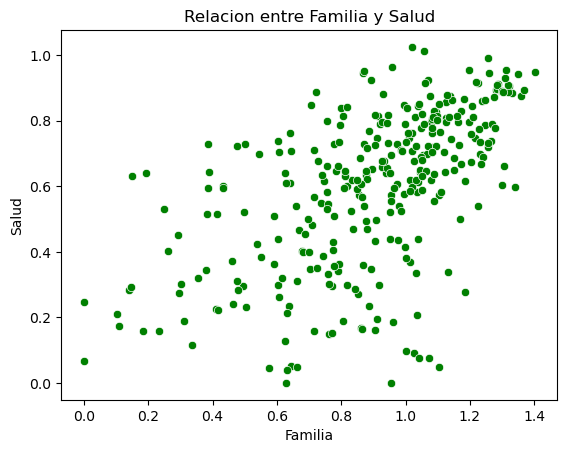

In [65]:
sns.scatterplot(df_merged, x='Family', y='Health (Life Expectancy)', color = 'green')
plt.title('Relacion entre Familia y Salud')
plt.xlabel('Familia')
plt.ylabel('Salud')
# Parece haber una relacion positiva entre Familia y Salud para este dataset.

Mostramos de forma gráfica la relación entre la puntuación de felicidad y la confianza (corrupción del gobierno).

'Parece ser que a menores niveles de corrupcion las personas tienden a tener mayores niveles de felicidad. \nAunque no parece haber una correlacion positiva tan alta como tal\n'

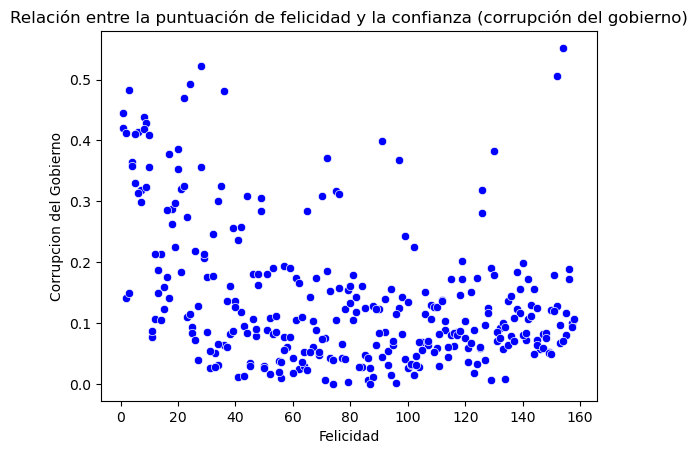

In [67]:
sns.scatterplot(df_merged, x='Happiness Rank', y='Trust (Government Corruption)', color='blue')
plt.title('Relación entre la puntuación de felicidad y la confianza (corrupción del gobierno)')
plt.xlabel('Felicidad')
plt.ylabel('Corrupcion del Gobierno')
#Parece ser que a menores niveles de corrupcion las personas tienden a tener mayores niveles de felicidad. 
#Aunque no parece haber una correlacion positiva tan alta como tal



Mostramos la matriz de correlación del dataframe

In [76]:
df_2 = df_merged.drop(['Country', 'Region'], axis=1)
df_2.head(3)
#Queremos analizar la correlación entre variables numéricas, por lo tanto,
#puede ser más limpio y relevante excluir 'Country' y 'Region' de la matriz de correlación.
df_2.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
Happiness Rank,1.000000,-0.993905,0.057798,-0.783247,-0.686502,-0.741182,-0.545570,-0.378864,-0.152613,-0.522146,-0.654761,-0.517176
Happiness Score,-0.993905,1.000000,-0.061461,0.779171,0.693547,0.734491,0.556414,0.397989,0.168272,0.526343,0.657867,0.522025
Standard Error,0.057798,-0.061461,1.000000,-0.186844,0.266522,0.027844,0.126096,-0.039259,-0.046720,-0.151971,-0.319548,0.590531
Economy (GDP per Capita),-0.783247,0.779171,-0.186844,1.000000,0.566283,0.789103,0.331127,0.294856,-0.015402,0.079411,0.569372,0.327613
Family,-0.686502,0.693547,0.266522,0.566283,1.000000,0.569937,0.476671,0.205060,0.075987,0.053264,0.328484,0.589485
Health (Life Expectancy),-0.741182,0.734491,0.027844,0.789103,0.569937,1.000000,0.369799,0.249773,0.088002,0.025248,0.426750,0.480799
Freedom,-0.545570,0.556414,0.126096,0.331127,0.476671,0.369799,1.000000,0.492875,0.356615,0.034829,0.290399,0.414610
Trust (Government Corruption),-0.378864,0.397989,-0.039259,0.294856,0.205060,0.249773,0.492875,1.000000,0.289499,-0.023504,0.246669,0.217762
Generosity,-0.152613,0.168272,-0.046720,-0.015402,0.075987,0.088002,0.356615,0.289499,1.000000,-0.110632,0.114212,0.070059
Dystopia Residual,-0.522146,0.526343,-0.151971,0.079411,0.053264,0.025248,0.034829,-0.023504,-0.110632,1.000000,0.417139,0.142881


Tras unir los dataframes, los países aparecerán más de una vez. Muestra agrupado el dataframe por país con el valor máximo de felicidad, sin importar el año.

In [80]:
df_merged.groupby('Country')['Happiness Score'].max().reset_index().sort_values(by='Happiness Score', ascending=False).reset_index(drop=True)

,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427
...,...,...
159,Rwanda,3.515
160,Benin,3.484
161,Togo,3.303
162,Syria,3.069


¿Tiene relación la felicidad con la generosidad? Lo mostraremos gráficamente a través de la puntuación de libertad.

Text(0, 0.5, 'Generosidad')

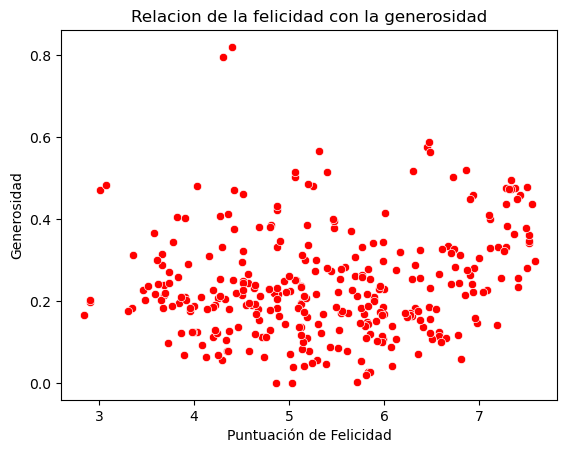

In [83]:
sns.scatterplot(df_merged, x='Happiness Score', y='Generosity', color='red')
plt.title('Relacion de la felicidad con la generosidad')
plt.xlabel('Puntuación de Felicidad')
plt.ylabel('Generosidad')
#Si observamos cierta relacion positiva entre la felicidad y los niveles de generosidad

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

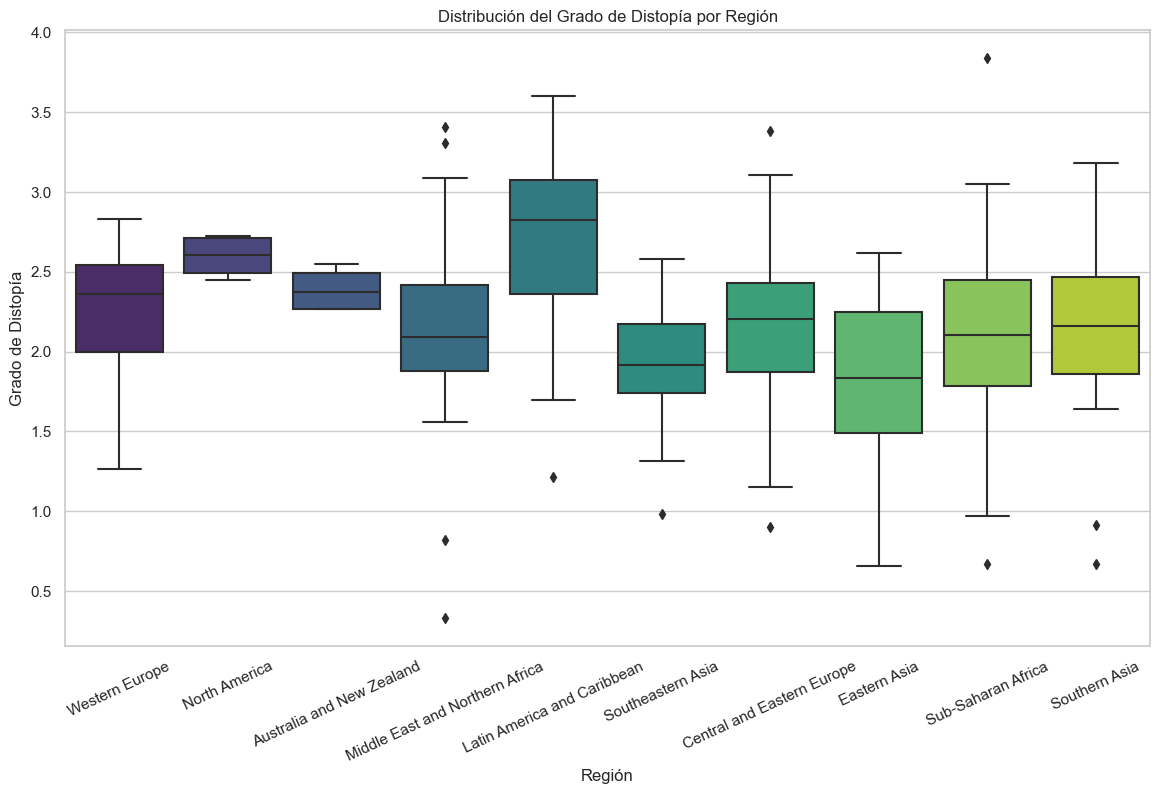

In [100]:
plt.figure(figsize=(14, 8))
sns.boxplot(df_merged, x='Region', y='Dystopia Residual', palette='viridis')
plt.title('Distribución del Grado de Distopía por Región')
plt.xlabel('Región')
plt.ylabel('Grado de Distopía')
plt.xticks(rotation=25)